In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#lalalala
#==================================#
#      Konstanta FISIKA            #
#==================================#
# 1/2 CD Rho V^2 + mg = m*a --> (Cd Rho V^2)/2m + g = a

def calculate_constant(mass,gravity , C_Drag, Area, rho):
    
    A = 9.81
    B = -(C_Drag * rho * Area) / (2 * mass)
    
    return A,B

#==================================#
#           Data dari FIBA         #
#==================================#
#Sementara pake bola size 7
MASS = 0.600 #580--620
CIRCUMFERENCE = 0.760 #750--770
RADIUS = CIRCUMFERENCE/(2*np.pi)
AREA = np.pi*RADIUS*RADIUS
RHO = 1.204
GRAVITY = 9.80
DRAG = 0.54
COR_HOOP = 0.6
COR_RING = 0.65
COR_RINGPLATE = 0.6

#KONSTANTA SIMULASI
ConstA, ConstB = calculate_constant(MASS,GRAVITY,DRAG,AREA,RHO)
print(f"A = {ConstA}\nB = {ConstB}")


#==================================#
#          Koordinat Lapangan   
#==================================#

#Backpost
BackPostX = 6.8
BackPostY = [-0.900,0.900]
BackPostZ = [2.28,3.33]

#RingPlate
RingPlateX = [6.8,(6.8-0.151)]
RingPlateY = [-0.075,0.075]
RingPlateZ = [2.43]

#Ring
RingCenter = [6.8, 0, 2.43] #X,Y,Z
RingDiameter = 0.450


#================================#
#           Cek Tabrakan         #
#================================#
# def CheckCollision (X,Y,Z):
    # CollisionEvent = 0
    # #Backpost
    # if np.isclose(X,BackPostX, atol=0 0.01) and BackPostY[0]<=Y<=BackPostY[1] and BackPostZ[0]<=Z<=BackPostZ[1]:
    #     CollisionEvent = 1
    
    # #Ringplate
    # if RingPlateX[0]<=X<=RingPlateX[1] and RingPlateY[0]<=Y<=RingPlateY[1] and np.isclose(RingPlateZ,Z, atol=0.01):
    #     CollisionEvent = 2

    # #Ring Hitbox
    # if (X-RingCenter[0])**2 + (Y-RingCenter[1])**2 <= RingDiameter and np.isclose(RingCenter[2]):
    #     CollisionEvent = 3 
    # return CollisionEvent

A = 9.81
B = -0.024903266790684157


In [24]:

#==================================#
#         SHOOTER FAHMI            #
#==================================#
def ShooterFahmi (X,Y,Z,Elevation,Rotation): #Sudut sementara dalam degree dan X,Y,Z koordinat Robot. (Hanya Shooter)

    #Spesifikasi Shooter 
    CenterToShaftX = -0.175
    RollerDiameter = 0.240
    CenterToShaftZ = 0.050 
    ShooterLength = 0.350 
    # Vmaks = 12

    #Konversi Sudut
    ShaftAngle = np.deg2rad(90-Elevation)
    Elevation = np.deg2rad(Elevation)
    Rotation = np.deg2rad(Rotation)


    #Perhitungan Posisi Bola saat ditembak
    InitialX = X - (CenterToShaftX + ((ShooterLength-RollerDiameter)/2 + RollerDiameter)*np.cos(ShaftAngle))*np.cos(Rotation)
    InitialY = Y + (CenterToShaftX + ((ShooterLength-RollerDiameter)/2 + RollerDiameter)*np.cos(ShaftAngle))*np.sin(Rotation)
    InitialZ = Z + CenterToShaftZ + ((ShooterLength-RollerDiameter)/2 + RollerDiameter)*np.sin(Elevation)
    return InitialX,InitialY,InitialZ

Elevation = 60
Rotation = 0
X = 0
Y = 0
Z = 0

Speed = np.array([0, 0, 0])
InitialState = np.array(ShooterFahmi(X,Y,Z,Elevation,Rotation))
InitialState = np.around(np.append(InitialState,Speed),decimals=3)

print(f"Robot initial State = {InitialState}")

Robot initial State = [-0.08   0.     0.305  0.     0.     0.   ]


In [ ]:
#===========================#
#      Shooter Nicko        #
#===========================#

def ShooterNicko (X,Y,Z,Elevation,Rotation):
   
   #Spesifikasi Shoter
   CenterToShaftX = -0.155
   CenterToShaftZ = 0.130
   
   
   ShooterLength = 0.650
   ShaftToShooterZ = 0.150
   #KonversiSudut
   ShaftAngle = np.deg2rad(Elevation)
   Rotation = np.deg2rad(Rotation)


   #Perhitungan
   InitialX = X + (CenterToShaftX-ShaftToShooterZ*np.sin(ShaftAngle)+ShooterLength*np.cos(ShaftAngle))*np.cos(Rotation)
   InitialY = Y + (CenterToShaftX-ShaftToShooterZ*np.sin(ShaftAngle)+ShooterLength*np.cos(ShaftAngle))*np.sin(Rotation)
   InitialZ = Z + CenterToShaftZ + ShaftToShooterZ*np.cos(ShaftAngle) + ShooterLength*np.sin(ShaftAngle)
   
   return InitialX,InitialY,InitialZ

Elevation = 30
Rotation = 90
X = 0
Y = 0
Z = 0

Speed = np.array([0, 0, 0])
InitialState = np.array(ShooterNicko(X,Y,Z,Elevation,Rotation))
InitialState = np.around(np.append(InitialState,Speed),decimals=3)


print(f"Robot initial State = {InitialState}")

Robot initial State = [0.    0.333 0.585 0.    0.    0.   ]


In [ ]:
#======================#
#       ODE SISTEM     #
#======================#
# sigma f = gravity + 1/2 Cd A V kuadrat
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
def ode_system(t, state, a,b):
    x, y, z, Vx, Vy, Vz = state
    dxdt = Vx
    dydt = Vy
    dzdt = Vz
    dVxdt = b * Vx**2
    dVydt = b * Vy**2
    dVzdt = -a + b * Vz**2
    return [dxdt, dydt, dzdt, dVxdt, dVydt, dVzdt]


#==============================#
#         Out of Bound         #
#==============================#
def Groundhit (t,y,A,B):
    return y[2] - 0
Groundhit.terminal = True
Groundhit.direction = -1 #Trigger when decreasing

def XoutofBond (t,y,A,B): 
    return y[0] - (10) #--> Backpost X position, ntah kenapa ga work kalau dimasukin variabel
XoutofBond.terminal = True
XoutofBond.direction = 1

#=============================#
#       Hit and Collision     #
#=============================#
 
    
def RealBackpostHit (t,y,A,B):
    X,Y,Z,VX,VY,VZ = y
    #Backpost X
    BackPostX_L = X-6.8 #X>6.78
    # BackPostY_L = Y+0.900 #Y>-0.900
    # BackPostY_U = Y-0.900 #Y<0.900
    BackPostZ_L = Z-2.38 #Z>2.38
    BackPostZ_U = Z-3.33 #Z<2.58
    # print(f"Time: {t}, X: {X}, Z: {Z}")
    # print(f"  BackPostX_L: {BackPostX_L}, BackPostX_U: {BackPostX_U}")
    # print(f"  BackPostZ_L: {BackPostZ_L}, BackPostZ_U: {BackPostZ_U}")
    print(f"Lower Count (-) : {BackPostZ_L}, Upper Count (+) : {BackPostZ_U} with Z value =  {Z}")
    if BackPostX_L>0 and BackPostZ_L>0 and BackPostZ_U<0:
      return -1
    else:
      return 1
RealBackpostHit.terminal = True


   

#=========================#
#   Entry speed Vector    #
#=========================#
def DirectionVector (ImpactVelocity): #Tested
    VX,VY,VZ = ImpactVelocity
    Rotation = np.arctan2(VY,VX)
    Elevation = np.arctan2(VZ,(np.sqrt(VY**2+VZ**2)))
    return np.rad2deg([Rotation,Elevation])

#========================#
#   Cari Kecepatan Awal  #
#========================#
def GetInitVel (Rotation,Elevation,Velocity):#Tested
    Rotation = np.deg2rad(Rotation)
    Elevation = np.deg2rad(Elevation)
    VX = Velocity*np.cos(Elevation)*np.cos(Rotation)
    VY = Velocity*np.cos(Elevation)*np.sin(Rotation)
    VZ = Velocity*np.sin(Elevation)
    return VX,VY,VZ

#=======================#
# Cari Kecepatan Bounce #
# =======================#
def GetBounceVel (BounceType,State): #--> Tested tapi kurang Ring Collision
   if BounceType == 2: #BackPost
      COR = COR_HOOP
      Damping = COR_HOOP #--> Mungkin masih butuh konfirmasi
      State[3] = State[3]*-COR
      State[4] = State[4]*Damping
      State[5] = State[5]*Damping
   
   if BounceType == 3: #RingPlate
      COR = COR_RINGPLATE
      Damping = COR_RINGPLATE #--> Mungkin masih butuh konfirmasi
      State[3] = State[3]*Damping
      State[4] = State[4]*Damping
      State[5] = State[5]*-COR

   
   return State

#===ROBOT POS====#

X0 = 0
Y0 = 0
Z0 = 0
Drag_Var_range = np.arange(0.5,0.6,0.01)

V_error_range = np.arange(-5,5,1)
hit_data = []
#===Velocity and Position Parameter
for Drag_var in Drag_Var_range:
   for V_error in V_error_range:
    

    Voutput = 10 + V_error
    Elevation = 40
    Rotation = 0



    SpeedVector = GetInitVel(Rotation,Elevation,Voutput) 
    Initialpos = ShooterFahmi(X0,Y0,Z0,Elevation,Rotation=0)
    InitialState = np.append(Initialpos,SpeedVector)

    timestart = 0
    timestop = 20
    solutiondensity = 1000
    A,B = calculate_constant(MASS,GRAVITY,Drag_var,AREA,RHO)
    # print(A,B)

    
    #Jumlah T_eval = TimeStop/SolutionDensity --> regardless berapa waktu sampai time stop
    Trajectory = solve_ivp(ode_system, [timestart,timestop], InitialState,args=(A,B), events=[Groundhit],t_eval=np.linspace(timestart,timestop,solutiondensity), dense_output=True, method='RK45'  )



    #==========================================#
    #          Ambil Posisi Tabrakan           #
    #==========================================#

    # LastState = np.array([Trajectory.y[0,-1],Trajectory.y[1,-1],Trajectory.y[2,-1]])
    # SpeedVector = np.array([Trajectory.y[3,-1],Trajectory.y[4,-1],Trajectory.y[5,-1]])
    # print(LastState)
    ImpactPoint = Trajectory.y[0,-1]

    hit_data.append([V_error,Drag_var,ImpactPoint])


#=====================#
#  Cek tipe Kolisi    #
#=====================#
# CollisionEvent = -1
# if Trajectory.t_events[0].size>0:
#     CollisionEvent = 0 #Groundhit
# if Trajectory.t_events[1].size>0:
#     CollisionEvent = 1 #Backpost
# if Trajectory.t_events[2].size>0: #X out of bond
#    CollisionEvent = 2

# MaxCollision = 1
# CollisionEvent = 0
# for i in range(MaxCollision):
#     if Trajectory.t_events[i].size>0:
#         CollisionEvent = i+1

# print(CollisionEvent)


#Kondisi terminasi simulasi
#Nilai Z TURUN dibawah 200

#========================#
#    Visualisasi Data    #
#========================#

# #X-Z plane
# plt.figure(figsize=(5,5))
# plt.plot(Trajectory.y[0],Trajectory.y[2],label = 'X-Z plane')
# plt.title('Trajectory X-Z')
# plt.xlabel('X')
# plt.ylabel('Z')
# # point1 = [BackPostX,BackPostX]
# # point2 = [BackPostZ[0],BackPostZ[1]]

# # plt.plot(point1,point2)
# # print(f"{point1,point2}")
# plt.savefig('X-Z Plane')

# plt.show

#==========================#
#     Visualisasi Table    #
#==========================#
# Print data
print(f"{'V_error':<10} {'Drag_Coeff':<10} {'ImpactPoint':<10}")
for row in hit_data:
    V_error, Drag_var, ImpactPoint = row
    print(f"{V_error:<10} {Drag_var:<10.2f} {ImpactPoint:<10.3f}")



V_error    Drag_Coeff ImpactPoint
-5         0.50       2.589     
-4         0.50       3.603     
-3         0.50       4.758     
-2         0.50       6.044     
-1         0.50       7.448     
0          0.50       8.958     
1          0.50       10.562    
2          0.50       12.108    
3          0.50       13.858    
4          0.50       15.519    
-5         0.51       2.588     
-4         0.51       3.600     
-3         0.51       4.753     
-2         0.51       6.036     
-1         0.51       7.436     
0          0.51       8.941     
1          0.51       10.406    
2          0.51       12.077    
3          0.51       13.818    
4          0.51       15.470    
-5         0.52       2.586     
-4         0.52       3.597     
-3         0.52       4.748     
-2         0.52       6.028     
-1         0.52       7.424     
0          0.52       8.924     
1          0.52       10.383    
2          0.52       12.047    
3          0.52       13.779    
4        

New loop with initial state  = [5.79495128e-03 0.00000000e+00 6.19205049e-01 9.58407892e+00
 0.00000000e+00 6.71084431e+00]
Lower Count (-) : -1.7607949512764414, Upper Count (+) : -2.7107949512764415 with Z value =  0.6192050487235585
Lower Count (-) : -1.7516244625204944, Upper Count (+) : -2.7016244625204946 with Z value =  0.6283755374795055
Lower Count (-) : -1.6610532684110133, Upper Count (+) : -2.6110532684110135 with Z value =  0.7189467315889865
Lower Count (-) : -0.8667819077246235, Upper Count (+) : -1.8167819077246237 with Z value =  1.5132180922753764
Lower Count (-) : -1.5448107245093246, Upper Count (+) : -2.4948107245093247 with Z value =  0.8351892754906755
Lower Count (-) : -22.947666856096678, Upper Count (+) : -23.897666856096677 with Z value =  -20.56766685609668
Sim is done, with exit event = [array([1.40064533]), array([], dtype=float64)]
Groundhit = [1.40064533]
BPBounce = []
Last state benda = [11.31279094  0.          0.14674815  7.04610683  0.         -7.463

<function matplotlib.pyplot.show(close=None, block=None)>

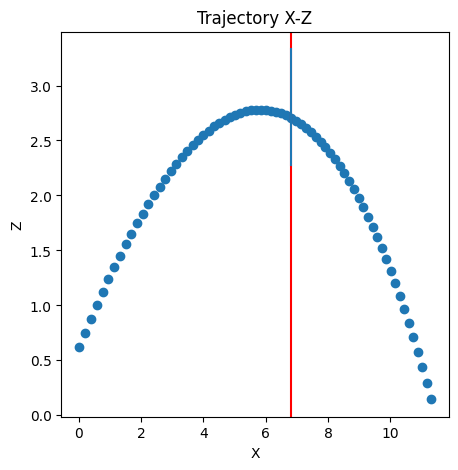

In [27]:
#============================#
#    Percobaan Looping       #
#============================#


#InitArg
X0 = 0
Y0 = 0
Z0 = 0.4
VOutput = 11.7

Rotation = 0
Elevation = 35 #--> Dalam derajat
IsShooterFahmi=True
IsAirBorn = True
A,B = calculate_constant(MASS,GRAVITY,Drag_var,AREA,RHO)
#Case shooter Fahmi
if IsShooterFahmi:
   ShooterCond = ShooterFahmi(X0,Y0,Z0,Elevation,Rotation)
   InitialState = [ShooterCond[0],ShooterCond[1],ShooterCond[2]]
#    SpeedMax = ShooterCond[3]

InitVel = GetInitVel(Rotation,Elevation,VOutput)
# print(InitVel)
InitialState = np.append(InitialState,InitVel)
# print(InitialState)
Event_Num = 5

A,B = calculate_constant(MASS,GRAVITY,Drag_var,AREA,RHO)
while IsAirBorn:
    # TempData = []

    print(f"New loop with initial state  = {InitialState}")
    Trajectory = solve_ivp(ode_system, [timestart,timestop], InitialState,args=(A,B), events=[Groundhit,RealBackpostHit],t_eval=np.linspace(timestart,timestop,solutiondensity), dense_output=True)
    print(f"Sim is done, with exit event = {Trajectory.t_events}\nGroundhit = {Trajectory.t_events[0]}\nBPBounce = {Trajectory.t_events[1]}")
    print(f"Last state benda = {Trajectory.y[:,-1]}")

    # TempData.append(Trajectory.y[:,-1])
    

    #CollisionCheck
    
    CollisionEvent = -1 #--> Default
    if Trajectory.t_events[0].size>0:
        #And Another Var.check
        CollisionEvent = 2 #-->Ground
    if Trajectory.t_events[1].size>0:
        #And Another Var Check --> if fail --> State 0 --> Pass last Initial State
        CollisionEvent = 3 #-->Backpost

    print(f"Event Detected = {CollisionEvent}")

    #Ground Termination 
    if CollisionEvent == 2:
        break

    #Backpost Tabrak
    if CollisionEvent == 3:
        InitialState = GetBounceVel(2,Trajectory.y[:,-1])
        print(f"Sim baru dibuat dengan InitState = {InitialState}")




print(f"Loop Done")
plt.figure(figsize=(5,5))
plt.title('Trajectory X-Z')
plt.xlabel('X')
plt.ylabel('Z')
plt.axvline(6.8,color = 'r')
plt.scatter(Trajectory.y[0],Trajectory.y[2])

# plt.axhline(0,0,Trajectory.y[0,-1],color = 'k')
plt.plot((BackPostX,BackPostX),(BackPostZ[0],BackPostZ[1]))

plt.savefig('X-Z Plane')

plt.show




    




In [28]:
#=================================================IMPROVEMENT PENDING================================================#

def GetBounceVel (BounceType,State):
   if BounceType == 2: #BackPost
      COR = COR_HOOP
      Damping = COR_HOOP #--> Mungkin masih butuh konfirmasi
      State[3] = State[3]*-COR
      State[4] = State[4]*Damping
      State[5] = State[5]*Damping
   
   if BounceType == 3: #RingPlate
      COR = COR_RINGPLATE
      Damping = COR_RINGPLATE #--> Mungkin masih butuh konfirmasi
      State[3] = State[3]*Damping
      State[4] = State[4]*Damping
      State[5] = State[5]*-COR

   
   return State


def Ring_NormalVector (X,Y,Z,State):
   # X,Y,Z --> Impact Point
   #==========================#
   #    Ring Normal Vector  #
   #==========================#

   #Torus Coordinate system
   # x_torus = (R + r*np.cos(theta)) * np.cos(phi) + XT
   # y_torus = (R + r*np.cos(theta)) * np.sin(phi) + YT
   # z_torus = r * np.sin(theta)

   R = 0.450 #--> Major Radius
   r = 0.040 #--> Minor Radius
   XT,YT,ZT = RingCenter
   X_prime = X-XT
   Y_prime = Y-YT
   Z_prime = Z-ZT

   theta = np.arcsin(Z_prime/r)
   phi = np.arctan2(Y_prime/X_prime-R)

   drdtheta = np.array([-r * np.sin(theta) * np.cos(phi), -r * np.sin(theta) * np.sin(phi), r * np.cos(theta)])
   dRdphi = np.array([-(R + r * np.cos(theta)) * np.sin(phi), (R + r * np.cos(theta)) * np.cos(phi), 0])






In [ ]:
#==============================================FUNCTION TESTER=====================================================#

def getScoringAngle (Hitpos):
   #Hitpos = Posisi saat Z = 2,43 list [X,Y,Z]:
   #Return Degree
   print(f"RingCenter: {RingCenter}")
   RingCenterX = RingCenter[0]
   RingCenterY = RingCenter[1]
   
    
   X = Hitpos[0]
   Y = Hitpos[1]

   Rotation = np.arctan2((RingCenterY-Y),(RingCenterX-X))
   Elevation = -45

   return np.rad2deg(Rotation),Elevation

LastState  =  [4,0,0,7,0,-7]
hitpos = LastState [0],LastState[1]
print(f"hitpos = {hitpos}")
InwardAngle = getScoringAngle(hitpos)
print(InwardAngle)

Velocity = [LastState[3],LastState[4],LastState[5]]
Rotation,Elevation = DirectionVector(Velocity)
print(f"Rotation = {SpeedVector[1]}")




hitpos = (4, 0)
RingCenter: [6.8, 0, 2.43]
(0.0, -45)


<function matplotlib.pyplot.show(close=None, block=None)>

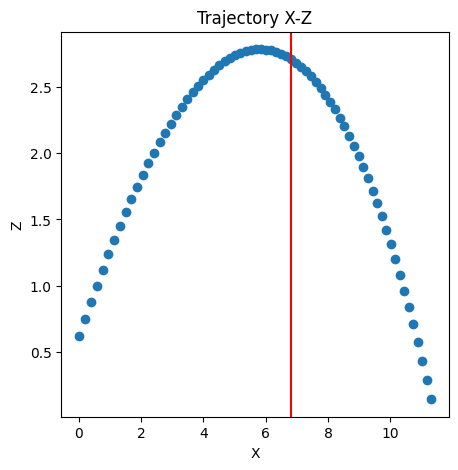

In [30]:
#==================================================Plotting PlaceHolder===========================================#
plt.figure(figsize=(5,5))
plt.scatter(Trajectory.y[0],Trajectory.y[2],label = 'X-Z plane')
plt.title('Trajectory X-Z')
plt.xlabel('X')
plt.ylabel('Z')
plt.axvline(6.8,color = 'r')
# plt.axhline(0,0,Trajectory.y[0,-1],color = 'k')

plt.savefig('X-Z Plane')

plt.show

Post-collision velocity components: 1.5999999999999996 2.4000000000000004 -3.2


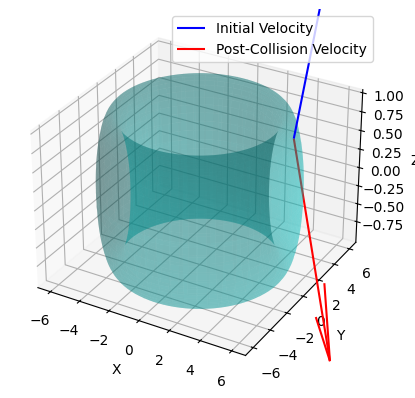

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def toroid_normal_vector(R, r, XT, YT, ZT, XI, YI, ZI):
    # Translate the collision point to the toroid's local coordinate system
    x_prime = XI - XT
    y_prime = YI - YT
    z_prime = ZI - ZT
    
    # Convert the collision point to toroidal coordinates (theta, phi)
    theta = np.arcsin(z_prime / r)
    phi = np.arctan2(y_prime, x_prime - R)
    
    # Partial derivatives with respect to theta and phi
    dR_dtheta = np.array([-r * np.sin(theta) * np.cos(phi), -r * np.sin(theta) * np.sin(phi), r * np.cos(theta)])
    dR_dphi = np.array([-(R + r * np.cos(theta)) * np.sin(phi), (R + r * np.cos(theta)) * np.cos(phi), 0])
    
    # Normal vector is the cross product of the partial derivatives
    normal_vector = np.cross(dR_dtheta, dR_dphi)
    
    # Normalize the normal vector
    normal_vector = normal_vector / np.linalg.norm(normal_vector)
    return normal_vector

def post_collision_velocity(ImpactVel, normal_vector, damping_factor):
    # Normalize the normal vector
    n = normal_vector / np.linalg.norm(normal_vector)
    
    # Decompose the impact velocity
    v_normal = np.dot(ImpactVel, n) * n
    v_tangential = ImpactVel - v_normal
    
    # Apply the Coefficient of Restitution and damping factor
    v_normal_after = -v_normal * damping_factor
    v_tangential_after = v_tangential * damping_factor
    
    # Calculate the post-collision velocity
    v_after = v_normal_after + v_tangential_after
    return v_after

# Example usage
R = 5  # Major radius
r = 1  # Minor radius
XT, YT, ZT = 0, 0, 0  # Center of the toroid
XI, YI, ZI = 6, 0, 1  # Collision point
VX, VY, VZ = 2, 3, 4  # Velocity before impact
damping_factor = 0.8  # Example damping factor

# Calculate the normal vector at the collision point
normal_vector = toroid_normal_vector(R, r, XT, YT, ZT, XI, YI, ZI)

# Calculate the post-collision velocity
ImpactVel = np.array([VX, VY, VZ])
v_after = post_collision_velocity(ImpactVel, normal_vector, damping_factor)

# Output the post-collision velocity components
VX_prime, VY_prime, VZ_prime = v_after
print("Post-collision velocity components:", VX_prime, VY_prime, VZ_prime)

# Visualization of input and output velocity vectors and toroid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot initial velocity vector
ax.quiver(XI, YI, ZI, VX, VY, VZ, color='b', label='Initial Velocity')

# Plot post-collision velocity vector
ax.quiver(XI, YI, ZI, VX_prime, VY_prime, VZ_prime, color='r', label='Post-Collision Velocity')

# Plot toroid surface for visualization
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
theta_grid, phi_grid = np.meshgrid(theta, phi)

x_toroid = (R + r*np.cos(theta_grid)) * np.cos(phi_grid) + XT
y_toroid = (R + r*np.cos(theta_grid)) * np.sin(phi_grid) + YT
z_toroid = r * np.sin(theta_grid) + ZT

ax.plot_surface(x_toroid, y_toroid, z_toroid, color='c', alpha=0.3)

# Set plot labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

In [ ]:
#==============================Percobaan batas kontinyu untuk ODE=============================#
import math
def RestriksiKontinyu (a,x,b,c,y,d,e,z,f):
   #Fungsi nilai
   alpha = 1e-2
   try: 
      Result = -math.exp(-alpha/((x-a)*(b-x)))*math.exp(-alpha/((y-c)*(d-y)))*math.exp(-alpha/((z-e)*(f-z)))
   
   except ZeroDivisionError:
      Result = 0.0

   if Result<0:
      IsIn = True
   else:
      IsIn = False

   return IsIn,Result

#Test batas
#Limit X
BackPostX_L = 6.78
BackPostX_U = 6.8

#Limit Y
BackPostY_L = -0.900 #Y>-0.900
BackPostY_U = 0.900 #Y<0.90
BackPostZ_L = 2.38 #Z>2.38
BackPostZ_U = 3.33 #Z<2.58

X = 6.785
Y = 0
Z = 2.39

print(f"",{RestriksiKontinyu(BackPostX_L,X,BackPostX_U,BackPostY_L,Y,BackPostY_U,BackPostZ_L,Z,BackPostZ_U)})